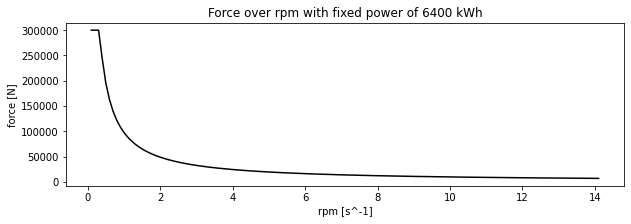

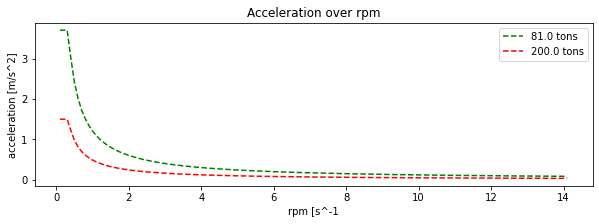

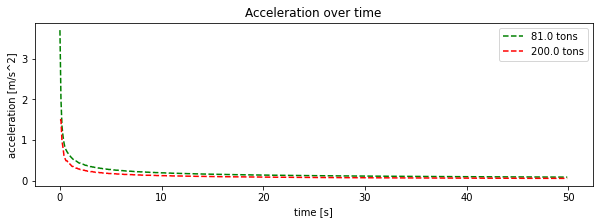

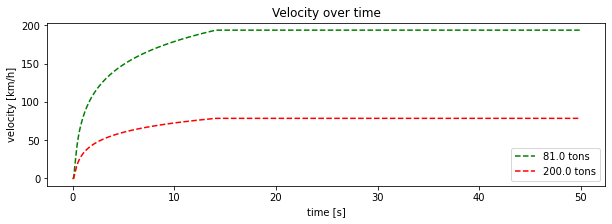

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def force_from_rpm(rpm, max_pwr, current_pwr, max_force, wheel_r):
    torque = current_pwr * 9.549 / rpm
    force = torque / wheel_r
    force = np.clip(force, a_min=0, a_max=max_force * 1/max_pwr * current_pwr)

    return force

def acceleration_from_force(force, mass):
    return force / mass

def acceleration_at_time(time):
    return time

def get_acceleration_over_time(acceleration, wheel_r, time):
    acceleration_over_time = np.empty(len(time))
    acceleration_over_time.fill(0)
    current_rpm = 0
    for index, timepoint in enumerate(time):
        if index == 0:
            acceleration_over_time[index] = acceleration[index]
            continue
        last_acceleration = acceleration_over_time[index-1]
        last_time = time[index-1]
        new_rpm = (last_acceleration * (timepoint - last_time)) / wheel_r
        assert(new_rpm > 0)
        current_rpm += new_rpm
        current_rpm_for_index = round(current_rpm, 1)
        rpm_index = current_rpm_for_index * 10 - 1
        acceleration_over_time[index] = acceleration[rpm_index.astype(int)]
    return acceleration_over_time

def get_velocity_over_time(acceleration, time):
    velocity_over_time = np.empty(len(time))
    velocity_over_time.fill(0)

    for index, timestamp in enumerate(time):
        velocity_over_time[index] = np.trapz(acceleration[:index])
    
    return velocity_over_time

def create_plot(max_pwr_kwh, current_pwr_kwh, max_force, max_speed_kmh, wheel_r):
    circum = 2 * np.pi * wheel_r
    max_speed_ms = max_speed_kmh / 3.6

    max_rpm = max_speed_ms / circum
    rpm = np.arange(0.1, max_rpm, 0.1)

    forces = force_from_rpm(rpm, max_pwr_kwh, current_pwr_kwh, max_force, wheel_r)


    plt.figure(figsize=(10,3))

    plt.title("Force over rpm with fixed power of {} kWh".format(current_pwr_kwh))
    plt.plot(rpm, forces , 'k')
    plt.xlabel("rpm [s^-1]")
    plt.ylabel("force [N]")
    plt.show()


    mass_1 = 81000
    mass_2 = 200000
    acceleration_1 = acceleration_from_force(forces, mass_1)
    acceleration_2 = acceleration_from_force(forces, mass_2)

    plt.figure(figsize=(10,3))
    plt.title("Acceleration over rpm")
    plt.xlabel("rpm [s^-1")
    plt.ylabel("acceleration [m/s^2]")
    plt.plot(rpm, acceleration_1, 'g--')
    plt.plot(rpm, acceleration_2, 'r--')
    plt.legend(['{} tons'.format(mass_1/1000), '{} tons'.format(mass_2/1000)])
    plt.show()

    # Plot acceleration over time
    time = np.arange(0, 50, 0.1)

    acceleration_over_time_1 = get_acceleration_over_time(acceleration_1, wheel_r, time)
    acceleration_over_time_2 = get_acceleration_over_time(acceleration_2, wheel_r, time)
    plt.figure(figsize=(10,3))
    plt.title("Acceleration over time")
    plt.xlabel("time [s]")
    plt.ylabel("acceleration [m/s^2]")
    plt.plot(time, acceleration_over_time_1, 'g--')
    plt.plot(time, acceleration_over_time_2, 'r--')
    plt.legend(['{} tons'.format(mass_1/1000), '{} tons'.format(mass_2/1000)])
    plt.show()


    # Plot speed per time
    plt.figure(figsize=(10,3))
    plt.title("Velocity over time")
    plt.xlabel("time [s]")
    plt.ylabel("velocity [km/h]")
    plt.plot(time, get_velocity_over_time(acceleration_1, time)*3.6, 'g--')
    plt.plot(time, get_velocity_over_time(acceleration_2, time)*3.6, 'r--')
    plt.legend(['{} tons'.format(mass_1/1000), '{} tons'.format(mass_2/1000)])
    plt.show()


create_plot(max_pwr_kwh=6400, current_pwr_kwh=6400, max_force=300000, max_speed_kmh=200, wheel_r=0.625 )